In [37]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from data_simulation import get_data_grunwald
from utils import get_measures


In [38]:
# 1: model well-specified, prior good
# 2: model well-specified, prior bad
# 3: model misspecified, prior good
# 4: model misspecified, prior bad
settings = {}
settings[1] = {"if_misspecified": False, "y": 0.0}
settings[2] = {"if_misspecified": False, "y": 5.0}
settings[3] = {"if_misspecified": True, "y": 0.0}
settings[4] = {"if_misspecified": True, "y": 5.0}


In [39]:
simulation_i = "grunwald"
setting_i = 4
y = settings[setting_i]["y"]
if_misspecified = settings[setting_i]["if_misspecified"]


In [40]:
# set seed
seed = 0
np.random.seed(seed)

# get data
d_x = 101  # number of fourier features
n_train = 100
n_test = 10000
var_likelihood = 0.025
X_train, Y_train, _ = get_data_grunwald(
    y=y, d_x=d_x, n_data=n_train, if_misspecified=if_misspecified
)
X_test, Y_test, _ = get_data_grunwald(
    y=y, d_x=d_x, n_data=n_test, if_misspecified=if_misspecified
)


In [41]:
lambs = np.linspace(0.1, 2.0, 30)


In [42]:
var_prior_1 = 0.01
var_prior_2 = 0.1
var_prior_3 = 1.0

log_risks_1, r_log_risks_1, emp_r_log_risks_1, kls_1, vars_prior_pred_1 = get_measures(
    var_prior_1, var_likelihood, X_train, Y_train, X_test, Y_test, lambs
)
log_risks_2, r_log_risks_2, emp_r_log_risks_2, kls_2, vars_prior_pred_2 = get_measures(
    var_prior_2, var_likelihood, X_train, Y_train, X_test, Y_test, lambs
)
log_risks_3, r_log_risks_3, emp_r_log_risks_3, kls_3, vars_prior_pred_3 = get_measures(
    var_prior_3, var_likelihood, X_train, Y_train, X_test, Y_test, lambs
)


0.1
0.16551724137931034


/Users/nsq277/Desktop/cold_pacbayes/cold-posteriors-and-pacbayes/utils.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var_prior = torch.tensor(var_prior)
/Users/nsq277/Desktop/cold_pacbayes/cold-posteriors-and-pacbayes/utils.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var_likelihood = torch.tensor(var_likelihood)


0.23103448275862068
0.296551724137931
0.3620689655172413
0.4275862068965517
0.49310344827586206
0.5586206896551723
0.6241379310344827
0.689655172413793
0.7551724137931034
0.8206896551724137
0.886206896551724
0.9517241379310344
1.0172413793103448
1.0827586206896551
1.1482758620689655
1.2137931034482758
1.2793103448275862
1.3448275862068966
1.410344827586207
1.475862068965517
1.5413793103448274
1.6068965517241378
1.6724137931034482
1.7379310344827585
1.803448275862069
1.8689655172413793
1.9344827586206894
2.0
0.1
0.16551724137931034
0.23103448275862068
0.296551724137931
0.3620689655172413
0.4275862068965517
0.49310344827586206
0.5586206896551723
0.6241379310344827
0.689655172413793
0.7551724137931034
0.8206896551724137
0.886206896551724
0.9517241379310344
1.0172413793103448
1.0827586206896551
1.1482758620689655
1.2137931034482758
1.2793103448275862
1.3448275862068966
1.410344827586207
1.475862068965517
1.5413793103448274
1.6068965517241378
1.6724137931034482
1.7379310344827585
1.80344827

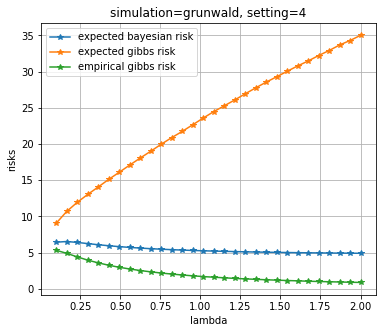

In [43]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, log_risks_1, "-*", label="expected bayesian risk")
plt.plot(lambs, r_log_risks_1, "-*", label="expected gibbs risk")
plt.plot(lambs, emp_r_log_risks_1, "-*", label="empirical gibbs risk")
plt.xlabel("lambda")
plt.ylabel("risks")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


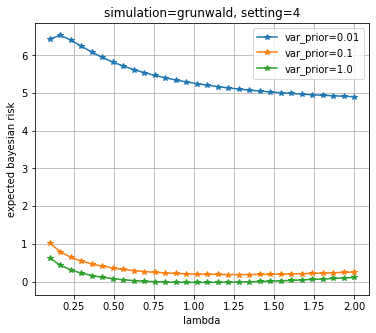

In [44]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, log_risks_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, log_risks_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, log_risks_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected bayesian risk")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_bayes_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


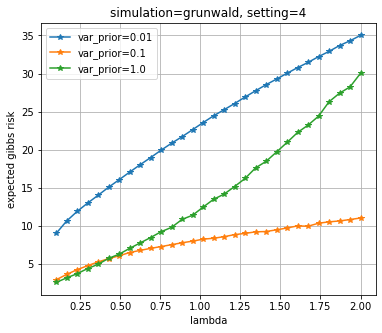

In [45]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, r_log_risks_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, r_log_risks_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, r_log_risks_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected gibbs risk")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_gibbs_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


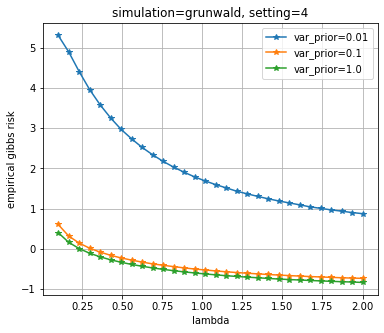

In [46]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, emp_r_log_risks_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, emp_r_log_risks_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, emp_r_log_risks_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("empirical gibbs risk")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_emp_gibbs_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


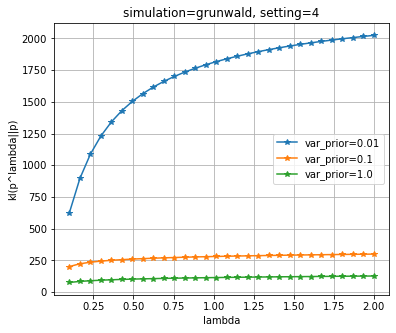

In [47]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, kls_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, kls_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, kls_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("kl(p^lambda||p)")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_kls_{setting_i}.jpg", bbox_inches="tight")
plt.show()


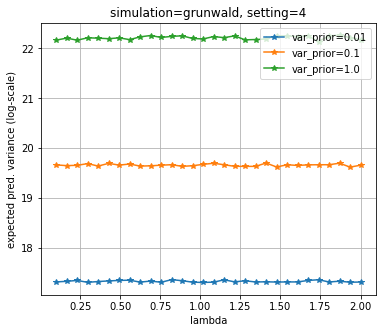

In [48]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, np.log(vars_prior_pred_1), "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, np.log(vars_prior_pred_2), "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, np.log(vars_prior_pred_3), "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected pred. variance (log-scale)")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_var_{setting_i}.jpg", bbox_inches="tight")
plt.show()
